# Exploring Chat Templates with SmolLM2

This notebook demonstrates how to use chat templates with the `SmolLM2` model. Chat templates help structure interactions between users and AI models, ensuring consistent and contextually appropriate responses.

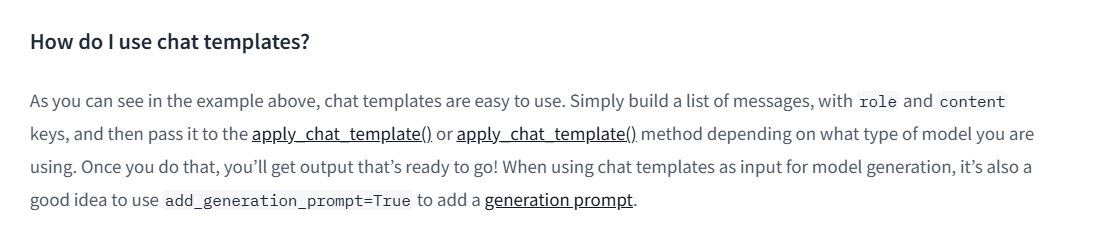

In [1]:
# Install the requirements in Google Colab
# !pip install transformers datasets trl huggingface_hub

# Authenticate to Hugging Face
from huggingface_hub import login

login()

# for convenience you can create an environment variable containing your hub token as HF_TOKEN

In [2]:
# Import necessary libraries
from transformers import AutoModelForCausalLM, AutoTokenizer
from trl import setup_chat_format
import torch

## SmolLM2 Chat Template

Let's explore how to use a chat template with the `SmolLM2` model. We'll define a simple conversation and apply the chat template.

In [3]:
# Dynamically set the device
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps" if torch.backends.mps.is_available() else "cpu"
)

model_name = "HuggingFaceTB/SmolLM2-135M"
model = AutoModelForCausalLM.from_pretrained(
    pretrained_model_name_or_path=model_name
).to(device)
tokenizer = AutoTokenizer.from_pretrained(pretrained_model_name_or_path=model_name)
model, tokenizer = setup_chat_format(model=model, tokenizer=tokenizer)

In [4]:
# Define messages for SmolLM2
messages = [
    {"role": "user", "content": "Hello, how are you?"},
    {
        "role": "assistant",
        "content": "I'm doing well, thank you! How can I assist you today?",
    },
]

# Apply chat template without tokenization

The tokenizer represents the conversation as a string with special tokens to describe the role of the user and the assistant.


In [5]:
input_text = tokenizer.apply_chat_template(messages, tokenize=False)

print("Conversation with template:", input_text)

Conversation with template: <|im_start|>user
Hello, how are you?<|im_end|>
<|im_start|>assistant
I'm doing well, thank you! How can I assist you today?<|im_end|>



# Decode the conversation

Note that the conversation is represented as above but with a further assistant message.


In [6]:
input_text = tokenizer.apply_chat_template(
    messages, tokenize=True, add_generation_prompt=True
)

print("Conversation decoded:", tokenizer.decode(token_ids=input_text))

Conversation decoded: <|im_start|>user
Hello, how are you?<|im_end|>
<|im_start|>assistant
I'm doing well, thank you! How can I assist you today?<|im_end|>
<|im_start|>assistant



# Tokenize the conversation

Of course, the tokenizer also tokenizes the conversation and special token as ids that relate to the model's vocabulary.



In [7]:
input_text = tokenizer.apply_chat_template(messages, add_generation_prompt=True)

print("Conversation tokenized:", input_text)

Conversation tokenized: [1, 4093, 198, 19556, 28, 638, 359, 346, 47, 2, 198, 1, 520, 9531, 198, 57, 5248, 2567, 876, 28, 9984, 346, 17, 1073, 416, 339, 4237, 346, 1834, 47, 2, 198, 1, 520, 9531, 198]


<div style='background-color: lightblue; padding: 10px; border-radius: 5px; margin-bottom: 20px; color:black'>
    <h2 style='margin: 0;color:blue'>Exercise: Process a dataset for SFT</h2>
    <p>Take a dataset from the Hugging Face hub and process it for SFT. </p>
    <p><b>Difficulty Levels</b></p>
    <p>🐢 Convert the `HuggingFaceTB/smoltalk` dataset into chatml format.</p>
    <p>🐕 Convert the `openai/gsm8k` dataset into chatml format.</p>
</div>

In [8]:
from IPython.core.display import display, HTML

display(
    HTML(
        """<iframe
  src="https://huggingface.co/datasets/HuggingFaceTB/smoltalk/embed/viewer/all/train?row=0"
  frameborder="0"
  width="100%"
  height="360px"
></iframe>
"""
    )
)

/tmp/ipykernel_196038/4068687702.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython.display
  from IPython.core.display import display, HTML


In [22]:
from datasets import load_dataset

ds = load_dataset("HuggingFaceTB/smoltalk", "everyday-conversations")

In [10]:
ds['train'][0]

{'full_topic': 'Travel/Vacation destinations/Beach resorts',
 'messages': [{'content': 'Hi there', 'role': 'user'},
  {'content': 'Hello! How can I help you today?', 'role': 'assistant'},
  {'content': "I'm looking for a beach resort for my next vacation. Can you recommend some popular ones?",
   'role': 'user'},
  {'content': "Some popular beach resorts include Maui in Hawaii, the Maldives, and the Bahamas. They're known for their beautiful beaches and crystal-clear waters.",
   'role': 'assistant'},
  {'content': 'That sounds great. Are there any resorts in the Caribbean that are good for families?',
   'role': 'user'},
  {'content': 'Yes, the Turks and Caicos Islands and Barbados are excellent choices for family-friendly resorts in the Caribbean. They offer a range of activities and amenities suitable for all ages.',
   'role': 'assistant'},
  {'content': "Okay, I'll look into those. Thanks for the recommendations!",
   'role': 'user'},
  {'content': "You're welcome. I hope you find

In [11]:
print(tokenizer.apply_chat_template(ds['train'][0]['messages'], tokenize=False, add_generation_prompt=True))

<|im_start|>user
Hi there<|im_end|>
<|im_start|>assistant
Hello! How can I help you today?<|im_end|>
<|im_start|>user
I'm looking for a beach resort for my next vacation. Can you recommend some popular ones?<|im_end|>
<|im_start|>assistant
Some popular beach resorts include Maui in Hawaii, the Maldives, and the Bahamas. They're known for their beautiful beaches and crystal-clear waters.<|im_end|>
<|im_start|>user
That sounds great. Are there any resorts in the Caribbean that are good for families?<|im_end|>
<|im_start|>assistant
Yes, the Turks and Caicos Islands and Barbados are excellent choices for family-friendly resorts in the Caribbean. They offer a range of activities and amenities suitable for all ages.<|im_end|>
<|im_start|>user
Okay, I'll look into those. Thanks for the recommendations!<|im_end|>
<|im_start|>assistant
You're welcome. I hope you find the perfect resort for your vacation.<|im_end|>
<|im_start|>assistant



In [37]:
def process_dataset(sample):
    # TODO: 🐢 Convert the sample into a chat format
    # use the tokenizer's method to apply the chat template
    sample['formatted_messages'] = tokenizer.apply_chat_template(sample['messages'], tokenize=False, add_generation_prompt=False)
    return sample
    


ds = ds.map(process_dataset)

Map:   0%|          | 0/2260 [00:00<?, ? examples/s]

Map:   0%|          | 0/119 [00:00<?, ? examples/s]

In [14]:
display(
    HTML(
        """<iframe
  src="https://huggingface.co/datasets/openai/gsm8k/embed/viewer/main/train"
  frameborder="0"
  width="100%"
  height="360px"
></iframe>
"""
    )
)

In [15]:
ds_gsm = load_dataset("openai/gsm8k", "main")

README.md:   0%|          | 0.00/7.94k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/2.31M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/419k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/7473 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1319 [00:00<?, ? examples/s]

In [38]:
ds['train'][0]['messages']

[{'content': 'Hi there', 'role': 'user'},
 {'content': 'Hello! How can I help you today?', 'role': 'assistant'},
 {'content': "I'm looking for a beach resort for my next vacation. Can you recommend some popular ones?",
  'role': 'user'},
 {'content': "Some popular beach resorts include Maui in Hawaii, the Maldives, and the Bahamas. They're known for their beautiful beaches and crystal-clear waters.",
  'role': 'assistant'},
 {'content': 'That sounds great. Are there any resorts in the Caribbean that are good for families?',
  'role': 'user'},
 {'content': 'Yes, the Turks and Caicos Islands and Barbados are excellent choices for family-friendly resorts in the Caribbean. They offer a range of activities and amenities suitable for all ages.',
  'role': 'assistant'},
 {'content': "Okay, I'll look into those. Thanks for the recommendations!",
  'role': 'user'},
 {'content': "You're welcome. I hope you find the perfect resort for your vacation.",
  'role': 'assistant'}]

In [40]:
print(ds['train'][0]['formatted_messages'])

<|im_start|>user
Hi there<|im_end|>
<|im_start|>assistant
Hello! How can I help you today?<|im_end|>
<|im_start|>user
I'm looking for a beach resort for my next vacation. Can you recommend some popular ones?<|im_end|>
<|im_start|>assistant
Some popular beach resorts include Maui in Hawaii, the Maldives, and the Bahamas. They're known for their beautiful beaches and crystal-clear waters.<|im_end|>
<|im_start|>user
That sounds great. Are there any resorts in the Caribbean that are good for families?<|im_end|>
<|im_start|>assistant
Yes, the Turks and Caicos Islands and Barbados are excellent choices for family-friendly resorts in the Caribbean. They offer a range of activities and amenities suitable for all ages.<|im_end|>
<|im_start|>user
Okay, I'll look into those. Thanks for the recommendations!<|im_end|>
<|im_start|>assistant
You're welcome. I hope you find the perfect resort for your vacation.<|im_end|>



In [18]:
ds_gsm['train'][0]

{'question': 'Natalia sold clips to 48 of her friends in April, and then she sold half as many clips in May. How many clips did Natalia sell altogether in April and May?',
 'answer': 'Natalia sold 48/2 = <<48/2=24>>24 clips in May.\nNatalia sold 48+24 = <<48+24=72>>72 clips altogether in April and May.\n#### 72'}

In [35]:
def process_dataset(sample):
    # TODO: 🐕 Convert the sample into a chat format

    # 1. create a message format with the role and content
    sample['messages'] = [{'content': sample['question'], 'role': 'user'}, {'content': sample['answer'], 'role': 'assistant'}]
    # 2. apply the chat template to the samples using the tokenizer's method
    sample['formatted_messages'] = tokenizer.apply_chat_template(sample['messages'], tokenize=False, add_generation_prompt=False)
    return sample


ds_gsm = ds_gsm.map(process_dataset)

Map:   0%|          | 0/7473 [00:00<?, ? examples/s]

Map:   0%|          | 0/1319 [00:00<?, ? examples/s]

In [36]:
print(ds_gsm['train'][0]['formatted_messages'])

<|im_start|>user
Natalia sold clips to 48 of her friends in April, and then she sold half as many clips in May. How many clips did Natalia sell altogether in April and May?<|im_end|>
<|im_start|>assistant
Natalia sold 48/2 = <<48/2=24>>24 clips in May.
Natalia sold 48+24 = <<48+24=72>>72 clips altogether in April and May.
#### 72<|im_end|>



Generation prompt по идее добавлять не надо, потому что законченные диалоги

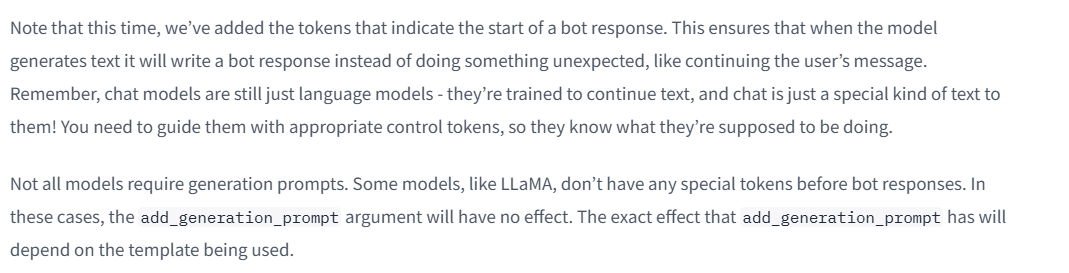

Хотя как будто это безвредная операция

## Conclusion

This notebook demonstrated how to apply chat templates to different models, `SmolLM2`. By structuring interactions with chat templates, we can ensure that AI models provide consistent and contextually relevant responses.

In the exercise you tried out converting a dataset into chatml format. Luckily, TRL will do this for you, but it's useful to understand what's going on under the hood.